<a href="https://colab.research.google.com/github/ankishore/linear_regression_pytorch/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create dataset

Text(0.5, 0, 'X')

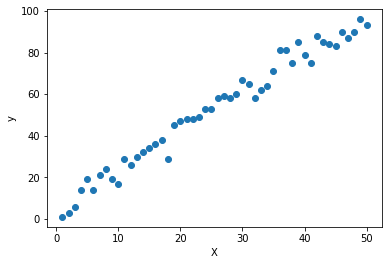

In [3]:
# Create input tensor. 50 rows. 1 column/feature.
X = torch.linspace(1, 50, 50).reshape(-1, 1)

# Add noise to output tensor
e = torch.randint(-8, 9, (50, 1), dtype=torch.float)

# Create output tensor with weight=2, bias=1 and noise
y = 2*X + 1 + e

# Plot data
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('X')

# Create a model with single fully connected layer
Fully connected layer is also called dense or linear layer

In [12]:
class Model(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)
  
  def forward(self, X):
    y_pred = self.linear(X)
    return y_pred

# Plot model prediction(with default/untrained hyper-parameters) vs dataset

Initial weight: 0.08069276809692383 
Initial bias: 0.0642242431640625


Text(0.5, 0, 'X')

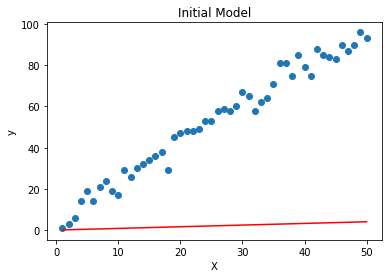

In [20]:
# Instantiate a model
model = Model(1, 1)

# Get initial hyper-parameters. Weight and bias.
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
print('Initial weight:', w1, '\nInitial bias:', b1)

# Get predicted value using initial hyper-parameter.
y1 = X*w1 + b1

# Plot dataset vs predicted values
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), y1.numpy(), 'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('X')

# Set loss function and optimizer

In [22]:
# Mean squared error loss function
criterion = nn.MSELoss()

# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the model

In [23]:
epochs = 50
losses = [] # log the loss for each epoch

for i in range(epochs):
  y_pred = model.forward(X)

  loss = criterion(y_pred, y)
  losses.append(loss)

  print('epoch:', i, ' loss:', loss.item(), ' weight:', model.linear.weight.item(), ' bias:', model.linear.bias.item())

  # reset Gradient before back-propagation. Pytorch accumulates them.
  optimizer.zero_grad()
  loss.backward() # Calculate gradient
  optimizer.step() # Update hyper-parameters i.e. weight and bias

epoch: 0  loss: 3215.742919921875  weight: 0.08069276809692383  bias: 0.0642242431640625
epoch: 1  loss: 1672.26513671875  weight: 3.3907477855682373  bias: 0.16514046490192413
epoch: 2  loss: 875.419677734375  weight: 1.012291669845581  bias: 0.0970420390367508
epoch: 3  loss: 464.03399658203125  weight: 2.7211179733276367  bias: 0.15038108825683594
epoch: 4  loss: 251.64691162109375  weight: 1.493168830871582  bias: 0.116463303565979
epoch: 5  loss: 141.9958038330078  weight: 2.375338315963745  bias: 0.14523877203464508
epoch: 6  loss: 85.38362121582031  weight: 1.741355299949646  bias: 0.1289660483598709
epoch: 7  loss: 56.153621673583984  weight: 2.1967508792877197  bias: 0.1450589895248413
epoch: 8  loss: 41.060096740722656  weight: 1.869411587715149  bias: 0.13789457082748413
epoch: 9  loss: 33.26468276977539  weight: 2.1044793128967285  bias: 0.14743879437446594
epoch: 10  loss: 29.237024307250977  weight: 1.9354490041732788  bias: 0.1449754685163498
epoch: 11  loss: 27.15453338

# Plot model prediction(with trained hyper-parameters) vs dataset

Text(0.5, 0, 'X')

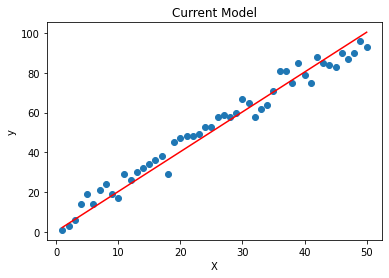

In [24]:
# Get weight and bias for the trained model
w1, b1 = model.linear.weight.item(), model.linear.bias.item()

# Get predicted values
y1 = X * w1 + b1

plt.scatter(X.numpy(), y.numpy())
plt.plot(X, y1, 'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('X')